In [2]:
import os
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from dotenv import load_dotenv
from scipy.stats import pearsonr, spearmanr
from sqlalchemy import create_engine

In [3]:
# Load .env from the current directory or specified path
dotenv_path = Path("/Users/pourya/IdeaProjects/DiffBenchmark/.env")
if load_dotenv(dotenv_path):
    print(f"✅ Loaded environment variables from {dotenv_path}")
else:
    print(f"⚠️ Warning: Failed to load .env from {dotenv_path}")

# Ensure required environment variables exist
required_vars = ["DB_NAME", "DB_USERNAME", "DB_PASSWORD"]
missing = [var for var in required_vars if not os.getenv(var)]
if missing:
    raise ValueError(f"Missing required environment variables: {missing}")

# Database connection settings from environment variables
db_config = {
    'dbname': os.getenv('DB_NAME'),
    'user': os.getenv('DB_USERNAME'),
    'password': os.getenv('DB_PASSWORD'),
    'host': os.getenv('DB_HOST', 'localhost'),
    'port': os.getenv('DB_PORT', '5432')
}

# SQLAlchemy connection string
conn_str = f"postgresql+psycopg2://{db_config['user']}:{db_config['password']}@{db_config['host']}:{db_config['port']}/{db_config['dbname']}"
engine = create_engine(conn_str)

# Table name
data_table_name = 'intel'
info_table_name = 'info'

✅ Loaded environment variables from /Users/pourya/IdeaProjects/DiffBenchmark/.env


In [4]:
try:
    df = pd.read_sql(f'SELECT * FROM {data_table_name}', engine)
    infos = pd.read_sql(f'Select * from {info_table_name}', engine)
    #rename the column file to srcPath in infos table
    infos = infos.rename(columns={'file': 'srcpath'})
except Exception as e:
    print(f"❌ Error: {e}")

In [5]:
df[['precision', 'recall', 'f1']] = df[['precision', 'recall', 'f1']].replace([np.inf, -np.inf], np.nan)
df = df.dropna(subset=['precision', 'recall', 'f1'])
df_original = df


In [87]:
# df = df.merge(infos[['commit', 'srcpath', 'interfilers']], on=['commit', 'srcpath'], how='left')
#
# # Remove rows where 'inter-files' is True
# df = df[df['interfilers'] != True]
#
# # Drop 'inter-files' column if you don't need it anymore
# df = df.drop(columns=['interfilers'])

In [6]:
df

,id,commit,conf,f1,fn_mappings,fn_programelements,fp_mappings,fp_programelements,matcher,n_sum,...,recall,repo,s,srcpath,tp_mappings,tp_programelements,tp_raw_mappings,tp_raw_programelements,trv_mappings,trv_programelements
0,1,d4992887291cc0a7eeda87ad547fa9e1e7fda41c,"{st_priocalc=size, st_minprio=4}",0.779661,6,1,5,1,SimpleGumtree,51,...,0.766667,https://github.com/deeplearning4j/deeplearning...,6,deeplearning4j-core/src/main/java/org/deeplear...,21,2,237,28,216,26
1,2,d4992887291cc0a7eeda87ad547fa9e1e7fda41c,"{st_priocalc=size, st_minprio=1}",0.800000,5,1,5,1,SimpleGumtree,50,...,0.800000,https://github.com/deeplearning4j/deeplearning...,8,deeplearning4j-core/src/main/java/org/deeplear...,22,2,238,28,216,26
2,3,d4992887291cc0a7eeda87ad547fa9e1e7fda41c,"{st_priocalc=height, st_minprio=3}",0.615385,12,2,5,1,SimpleGumtree,73,...,0.533333,https://github.com/deeplearning4j/deeplearning...,7,deeplearning4j-core/src/main/java/org/deeplear...,15,1,231,27,216,26
3,4,d4992887291cc0a7eeda87ad547fa9e1e7fda41c,"{st_priocalc=height, st_minprio=2}",0.779661,6,1,5,1,SimpleGumtree,51,...,0.766667,https://github.com/deeplearning4j/deeplearning...,6,deeplearning4j-core/src/main/java/org/deeplear...,21,2,237,28,216,26
4,5,d4992887291cc0a7eeda87ad547fa9e1e7fda41c,"{st_priocalc=size, st_minprio=3}",0.779661,6,1,5,1,SimpleGumtree,51,...,0.766667,https://github.com/deeplearning4j/deeplearning...,6,deeplearning4j-core/src/main/java/org/deeplear...,21,2,237,28,216,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
629845,629846,7a1659c12d76b510809dea1dea1f5100bcf4cd60,"{st_priocalc=size, st_minprio=3, bu_minsize=2000}",0.964286,4,0,2,0,HybridGumtree,80,...,0.952941,https://github.com/apache/pig.git,28,src/org/apache/pig/backend/hadoop/executioneng...,77,4,469,29,392,25
629846,629847,7a1659c12d76b510809dea1dea1f5100bcf4cd60,"{st_priocalc=size, st_minprio=4, bu_minsize=2000}",0.964286,4,0,2,0,HybridGumtree,80,...,0.952941,https://github.com/apache/pig.git,28,src/org/apache/pig/backend/hadoop/executioneng...,77,4,469,29,392,25
629847,629848,7a1659c12d76b510809dea1dea1f5100bcf4cd60,"{st_priocalc=height, st_minprio=4, bu_minsize=...",0.946108,6,0,3,0,HybridGumtree,88,...,0.929412,https://github.com/apache/pig.git,22,src/org/apache/pig/backend/hadoop/executioneng...,75,4,467,29,392,25
629848,629849,7a1659c12d76b510809dea1dea1f5100bcf4cd60,"{st_priocalc=size, st_minprio=5, bu_minsize=2000}",0.964286,4,0,2,0,HybridGumtree,80,...,0.952941,https://github.com/apache/pig.git,28,src/org/apache/pig/backend/hadoop/executioneng...,77,4,469,29,392,25


In [89]:
edSizeColumnName = 'edSize'
df[('%s' % edSizeColumnName)] = df['ni'] + df['nd'] + df['nu'] + df['nm']

grouped = df.groupby(['commit', 'srcpath'])[edSizeColumnName].agg(['min', 'max']).reset_index()
grouped = grouped.rename(columns={'min': 'min_X', 'max': 'max_X'})
df = df.merge(grouped, on=['commit', 'srcpath'], how='left')
df['score'] = (df['max_X'] - df[edSizeColumnName]) / (df['max_X'] - df['min_X'])


df[['score']] = df[['score']].replace([np.inf, -np.inf], np.nan)
df = df.dropna(subset=['score'])

In [90]:
df = df[['commit', 'srcpath', 'conf', 'score', 'precision', 'recall', 'f1']]

#print number of rows in df
print(df.shape[0])

596886


In [91]:
 # Assuming df is your DataFrame
pearson_precision = pearsonr(df['score'], df['precision'])
pearson_recall = pearsonr(df['score'], df['recall'])

spearman_precision = spearmanr(df['score'], df['precision'])
spearman_recall = spearmanr(df['score'], df['recall'])




In [92]:
print(pearson_precision)
print(pearson_recall)
print(spearman_precision)
print(spearman_recall)

PearsonRResult(statistic=np.float64(0.08249425805938751), pvalue=np.float64(0.0))
PearsonRResult(statistic=np.float64(0.3526990000332561), pvalue=np.float64(0.0))
SignificanceResult(statistic=np.float64(0.23196395441037232), pvalue=np.float64(0.0))
SignificanceResult(statistic=np.float64(0.4726164868079851), pvalue=np.float64(0.0))


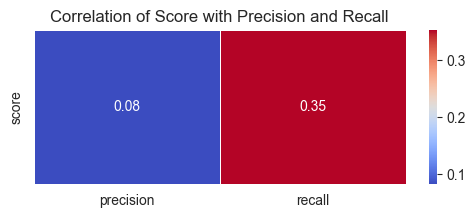

In [93]:
corr = df[['score', 'precision', 'recall']].corr()

# Slice to only include score correlations
corr_subset = corr.loc[['score'], ['precision', 'recall']]

# Plot heatmap
plt.figure(figsize=(6, 2))
sns.heatmap(corr_subset, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, cbar=True)
plt.title('Correlation of Score with Precision and Recall')
plt.show()

/var/folders/2z/bznpfb9n3m7cdpjcld_nwp8r0000gn/T/ipykernel_98230/2531944331.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['precision_bin'] = pd.cut(filtered_df['precision'], bins, labels=bins[:-1])
/var/folders/2z/bznpfb9n3m7cdpjcld_nwp8r0000gn/T/ipykernel_98230/2531944331.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['recall_bin'] = pd.cut(filtered_df['recall'], bins, labels=bins[:-1])
/var/folders/2z/bznpfb9n3m7cdpjcld_nwp8r0000gn/T/ipykernel_98230/2531944331.py:9: Futu

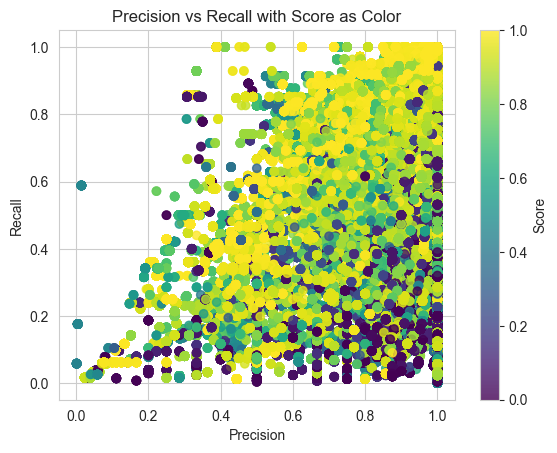

In [94]:
filtered_df = df[['score', 'precision', 'recall']]
bins = np.linspace(0, 1, 50)  # 50 evenly spaced bins from 0 to 1

# Bin precision and recall values
filtered_df['precision_bin'] = pd.cut(filtered_df['precision'], bins, labels=bins[:-1])
filtered_df['recall_bin'] = pd.cut(filtered_df['recall'], bins, labels=bins[:-1])

# Create a pivot table for the heatmap
heatmap_data = filtered_df.pivot_table(index='recall_bin', columns='precision_bin', values='score', aggfunc='mean')

# Plot the heatmap


# Create a scatter plot with precision on x-axis, recall on y-axis, and score as color
scatter = plt.scatter(filtered_df['precision'], filtered_df['recall'],
                      c=filtered_df['score'], cmap='viridis', alpha=0.8)

# Add a color bar to show the mapping of colors to score values
plt.colorbar(scatter, label='Score')

# Labels and title
plt.title('Precision vs Recall with Score as Color')
plt.xlabel('Precision')
plt.ylabel('Recall')
plt.grid(True)
plt.show()

/var/folders/2z/bznpfb9n3m7cdpjcld_nwp8r0000gn/T/ipykernel_98230/3678520985.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=score_corr.index, y=score_corr.values, palette='Blues_d')


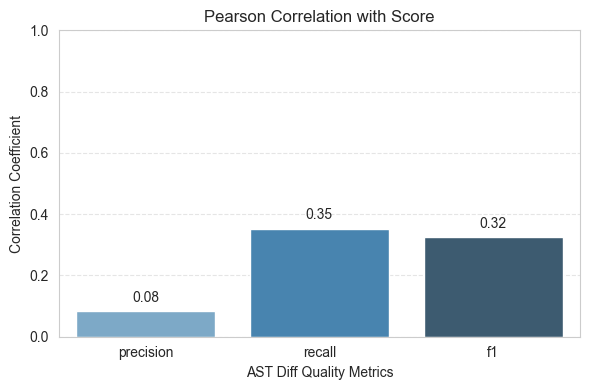

In [100]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlations
corr_matrix = df[['score', 'precision', 'recall', 'f1']].corr()

# Extract only score correlations with others (drop self-correlation)
score_corr = corr_matrix['score'].drop('score')

# Plot
plt.figure(figsize=(6, 4))
ax = sns.barplot(x=score_corr.index, y=score_corr.values, palette='Blues_d')
plt.ylim(0, 1)
plt.title('Pearson Correlation with Score')
plt.ylabel('Correlation Coefficient')
plt.xlabel('AST Diff Quality Metrics')
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Add value labels on top of bars
for bar in ax.patches:
    height = bar.get_height()
    ax.annotate(f'{height:.2f}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 5),
                textcoords='offset points',
                ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


In [108]:
df

,commit,srcpath,conf,score,precision,recall,f1
0,d4992887291cc0a7eeda87ad547fa9e1e7fda41c,deeplearning4j-core/src/main/java/org/deeplear...,"{st_priocalc=size, st_minprio=4}",0.999349,0.793103,0.766667,0.779661
1,d4992887291cc0a7eeda87ad547fa9e1e7fda41c,deeplearning4j-core/src/main/java/org/deeplear...,"{st_priocalc=size, st_minprio=1}",1.000000,0.800000,0.800000,0.800000
2,d4992887291cc0a7eeda87ad547fa9e1e7fda41c,deeplearning4j-core/src/main/java/org/deeplear...,"{st_priocalc=height, st_minprio=3}",0.985016,0.727273,0.533333,0.615385
3,d4992887291cc0a7eeda87ad547fa9e1e7fda41c,deeplearning4j-core/src/main/java/org/deeplear...,"{st_priocalc=height, st_minprio=2}",0.999349,0.793103,0.766667,0.779661
4,d4992887291cc0a7eeda87ad547fa9e1e7fda41c,deeplearning4j-core/src/main/java/org/deeplear...,"{st_priocalc=size, st_minprio=3}",0.999349,0.793103,0.766667,0.779661
...,...,...,...,...,...,...,...
614252,7a1659c12d76b510809dea1dea1f5100bcf4cd60,src/org/apache/pig/backend/hadoop/executioneng...,"{st_priocalc=size, st_minprio=3, bu_minsize=2000}",0.998900,0.975904,0.952941,0.964286
614253,7a1659c12d76b510809dea1dea1f5100bcf4cd60,src/org/apache/pig/backend/hadoop/executioneng...,"{st_priocalc=size, st_minprio=4, bu_minsize=2000}",0.998900,0.975904,0.952941,0.964286
614254,7a1659c12d76b510809dea1dea1f5100bcf4cd60,src/org/apache/pig/backend/hadoop/executioneng...,"{st_priocalc=height, st_minprio=4, bu_minsize=...",0.996701,0.963415,0.929412,0.946108
614255,7a1659c12d76b510809dea1dea1f5100bcf4cd60,src/org/apache/pig/backend/hadoop/executioneng...,"{st_priocalc=size, st_minprio=5, bu_minsize=2000}",0.998900,0.975904,0.952941,0.964286


In [ ]:
import numpy as np
import pandas as pd
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import product

# WESS calculation
def calculate_wess(weights, df):
    w1, w2, w3, w4 = weights
    return w1 * df['ni'] + w2 * df['nd'] + w3 * df['nm'] + w4 * df['nu']

# Normalize WESS per (commit, srcpath)
def normalize_wess(df, wess, edSizeColumnName):
    df = df.copy()
    df[edSizeColumnName] = wess

    grouped = df.groupby(['commit', 'srcpath'])[edSizeColumnName].agg(['min', 'max']).reset_index()
    grouped.columns = ['commit', 'srcpath', 'min_wess', 'max_wess']
    df = df.merge(grouped, on=['commit', 'srcpath'], how='left')

    df['score'] = (df['max_wess'] - df[edSizeColumnName]) / (df['max_wess'] - df['min_wess'])
    df['score'] = df['score'].replace([np.inf, -np.inf], np.nan)
    df = df.dropna(subset=['score'])

    return df

# Optimize weights and keep top 5
def optimize_weights(df_original, target_metric, edSizeColumnName):
    weight_values = [0, 0.2, 0.4, 0.6, 0.8, 1.0]
    weight_combinations = list(product(weight_values, repeat=4))

    results = []

    count = 0
    for weights in weight_combinations:
        count += 1
        print(f"Testing weights: {weights}" f"({count}/{len(weight_combinations)})")
        wess = calculate_wess(weights, df_original)
        df_scored = normalize_wess(df_original, wess, edSizeColumnName)

        if df_scored.empty:
            continue

        corr, _ = pearsonr(df_scored['score'], df_scored[target_metric])
        results.append((weights, corr))

    # Sort and get top 5
    results.sort(key=lambda x: x[1], reverse=True)
    top_results = results[:5]

    print(f"\nTop 5 weights for {target_metric}:")
    for i, (w, c) in enumerate(top_results):
        print(f"{i+1}. Weights={w}, Correlation={c:.4f}")

    return top_results

# Run for all metrics
edSizeColumnName = 'WESS'
metrics = ['precision', 'recall', 'f1']
top_results_by_metric = {}

for metric in metrics:
    top_results_by_metric[metric] = optimize_weights(df, metric, edSizeColumnName)

# Plot top 5 results per metric
for metric in metrics:
    weights = ['+'.join(map(str, w)) for w, _ in top_results_by_metric[metric]]
    correlations = [corr for _, corr in top_results_by_metric[metric]]

    plt.figure(figsize=(8, 4))
    sns.barplot(x=weights, y=correlations, palette='viridis')
    plt.ylim(0, 1)
    plt.title(f'Top 5 WESS Weights for {metric.capitalize()}')
    plt.ylabel('Pearson Correlation')
    plt.xlabel('Weight Combination (ni+nd+nm+nu)')
    plt.xticks(rotation=30, ha='right')

    for i, val in enumerate(correlations):
        plt.text(i, val + 0.02, f'{val:.2f}', ha='center', va='bottom', fontsize=9)

    plt.tight_layout()
    plt.show()


Testing weights: (0, 0, 0, 0)(1/1296)
Testing weights: (0, 0, 0, 0.2)(2/1296)
Testing weights: (0, 0, 0, 0.4)(3/1296)
Testing weights: (0, 0, 0, 0.6)(4/1296)
Testing weights: (0, 0, 0, 0.8)(5/1296)
Testing weights: (0, 0, 0, 1.0)(6/1296)
Testing weights: (0, 0, 0.2, 0)(7/1296)
Testing weights: (0, 0, 0.2, 0.2)(8/1296)
Testing weights: (0, 0, 0.2, 0.4)(9/1296)
Testing weights: (0, 0, 0.2, 0.6)(10/1296)
Testing weights: (0, 0, 0.2, 0.8)(11/1296)
Testing weights: (0, 0, 0.2, 1.0)(12/1296)
Testing weights: (0, 0, 0.4, 0)(13/1296)
Testing weights: (0, 0, 0.4, 0.2)(14/1296)
Testing weights: (0, 0, 0.4, 0.4)(15/1296)
Testing weights: (0, 0, 0.4, 0.6)(16/1296)
Testing weights: (0, 0, 0.4, 0.8)(17/1296)
Testing weights: (0, 0, 0.4, 1.0)(18/1296)
Testing weights: (0, 0, 0.6, 0)(19/1296)
Testing weights: (0, 0, 0.6, 0.2)(20/1296)
Testing weights: (0, 0, 0.6, 0.4)(21/1296)
Testing weights: (0, 0, 0.6, 0.6)(22/1296)
Testing weights: (0, 0, 0.6, 0.8)(23/1296)
Testing weights: (0, 0, 0.6, 1.0)(24/129